In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
files_input = ['Activity-Data/Elevator & Stair/1/1Activity.csv', 'Activity-Data/Elevator & Stair/2/2Activity.csv',
         'Activity-Data/Elevator & Stair/3/3Activity.csv', 'Activity-Data/Elevator & Stair/4/4Activity.csv', 
         'Activity-Data/Elevator & Stair/5/5Activity.csv','Activity-Data/Elevator & Stair/6/6Activity.csv', 
         'Activity-Data/Elevator & Stair/7/7Activity.csv', 'Activity-Data/Elevator & Stair/8/8Activity.csv', 
         'Activity-Data/Elevator & Stair/9/9Activity.csv']

In [56]:
input_pressure_file = 'Activity-Data/Elevator & Stair/2/2Pressure.csv'

In [57]:
raw_pressure_values = pd.read_csv(input_pressure_file, header=0, delimiter=',')
print(len(raw_pressure_values))
raw_pressure_values.head()

390


,timestamp,pressure,UUID
0,1498222549723,958.629150,80ec3f676e17debf
1,1498222605646,958.629395,80ec3f676e17debf
2,1498222606005,958.531982,80ec3f676e17debf
3,1498222606185,958.483643,80ec3f676e17debf
4,1498222606379,958.430908,80ec3f676e17debf


In [41]:
type(raw_pressure_values['timestamp']), type(raw_pressure_values[' pressure'])

(pandas.core.series.Series, pandas.core.series.Series)

In [60]:
pressure = raw_pressure_values[' pressure'].values
pressure.shape

(279,)

In [61]:
ts = raw_pressure_values['timestamp'].values
ts.shape

(279,)

## Derivative of Raw pressure values

In [62]:
derivative = np.gradient(pressure,ts)

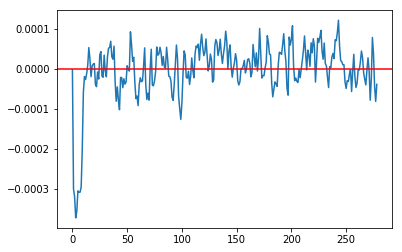

In [63]:
plt.plot(derivative)
plt.axhline(y=0,color='r')

In [46]:
gradient_pd = pd.DataFrame(derivative)

In [25]:
gradient_pd.head(), gradient_pd.tail(), len(gradient_pd) 

(          0
 0 -0.000247
 1 -0.000244
 2 -0.000249
 3 -0.000257
 4 -0.000234,             0
 398 -0.000046
 399 -0.000093
 400 -0.000016
 401 -0.000002
 402 -0.000033, 403)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc50d027a20>]], dtype=object)

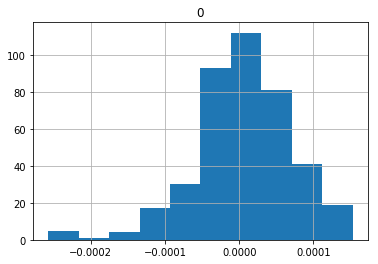

In [26]:
gradient_pd.hist()

## Labelling on Raw Derivatives

In [27]:
def identify_transition(row):
    if row[0] > 0:
        return 'walking upstairs'
    elif row[0] == 0:
        return 'walking'
    else:
        return 'walking downstairs'

In [47]:
gradient_pd['transition'] = gradient_pd.apply(identify_transition, axis=1)


In [48]:
gradient_pd.head()

,0,transition
0,-0.000247,walking downstairs
1,-0.000244,walking downstairs
2,-0.000249,walking downstairs
3,-0.000257,walking downstairs
4,-0.000234,walking downstairs


In [49]:
pd.value_counts(gradient_pd['transition'])

walking upstairs      227
walking downstairs    176
Name: transition, dtype: int64

In [50]:
gradient_pd = pd.concat([gradient_pd[0], gradient_pd['transition'], raw_pressure_values['timestamp']], axis=1)

In [51]:
gradient_pd.head()

,0,transition,timestamp
0,-0.000247,walking downstairs,1498222476815
1,-0.000244,walking downstairs,1498222477172
2,-0.000249,walking downstairs,1498222477362
3,-0.000257,walking downstairs,1498222477534
4,-0.000234,walking downstairs,1498222477715


In [52]:
gradient_pd.tail()

,0,transition,timestamp
398,-0.000046,walking downstairs,1498222549013
399,-0.000093,walking downstairs,1498222549179
400,-0.000016,walking downstairs,1498222549358
401,-0.000002,walking downstairs,1498222549539
402,-0.000033,walking downstairs,1498222549723


In [53]:
print(gradient_pd)

                0          transition      timestamp
0   -2.468761e-04  walking downstairs  1498222476815
1   -2.442522e-04  walking downstairs  1498222477172
2   -2.487451e-04  walking downstairs  1498222477362
3   -2.571220e-04  walking downstairs  1498222477534
4   -2.336736e-04  walking downstairs  1498222477715
5   -1.530701e-04  walking downstairs  1498222477894
6   -1.070515e-04  walking downstairs  1498222478082
7   -8.034412e-05  walking downstairs  1498222478255
8   -1.227523e-05  walking downstairs  1498222478434
9    1.559054e-05    walking upstairs  1498222478613
10  -4.537297e-05  walking downstairs  1498222478795
11  -8.964179e-05  walking downstairs  1498222478973
12  -5.275068e-05  walking downstairs  1498222479156
13  -7.251737e-05  walking downstairs  1498222479336
14  -4.494612e-05  walking downstairs  1498222479513
15  -5.624028e-06  walking downstairs  1498222479693
16   3.689503e-05    walking upstairs  1498222479879
17   1.224933e-04    walking upstairs  1498222

## Raw Pressure Values

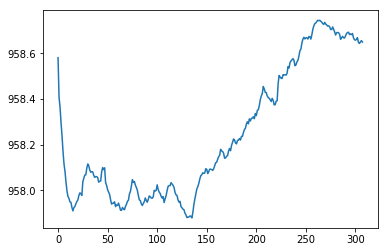

In [2]:
input_pressure_file = 'Activity-Data/Elevator & Stair/4/4Pressure.csv'
raw_pressure_values = pd.read_csv(input_pressure_file, header=0, delimiter=',')
plt.plot(raw_pressure_values[' pressure'])

In [143]:
raw_pressure_values.head(), len(raw_pressure_values)

(       timestamp    pressure             UUID 
 0  1498222792102  958.580566  80ec3f676e17debf
 1  1498222851007  958.407959  80ec3f676e17debf
 2  1498222851223  958.365479  80ec3f676e17debf
 3  1498222851369  958.297119  80ec3f676e17debf
 4  1498222851547  958.240479  80ec3f676e17debf, 308)

In [144]:
raw_pressure_values.columns

Index(['timestamp', ' pressure', ' UUID '], dtype='object')

## Sliding Windows based on Time Windows(3s)

In [2]:
def create_sliding_windows_by_time(data_frame, window_time_period=3000):
    windows = []
    ts_windows = []
    ts_begin = None
#     window_time_period = 3000
    for row in data_frame.iterrows():
    #     print("Col1", type(row[1][1]))
    #     print("Col2", type(row[1][0]))
        if ts_begin == None:
    #         print(1)
            ts_begin = row[1][0]
            window = []
            ts_window = []
            window.append(row[1][1])
            ts_window.append(row[1][0])
        elif(row[1][0] <= (ts_begin + window_time_period)):
            window.append(row[1][1])
            ts_window.append(row[1][0])
        else:
            windows.append(window)
            ts_windows.append(ts_window)
            window = [row[1][1]]
            ts_window = [row[1][0]]
            ts_begin = row[1][0]
    ts_windows.append(ts_window)
    windows.append(window)
    windows = windows[1:]
    ts_windows = ts_windows[1:]
    print(len(ts_windows),len(windows))
    return windows, ts_windows

In [4]:
print(ts_windows[1],windows[1])

NameError: name 'ts_windows' is not defined

In [43]:
for i in range(len(windows)):
    print(len(windows[i]),len(ts_windows[i]))

17 17
16 16
14 14
17 17
16 16
17 17
14 14
14 14
15 15
17 17
17 17
17 17
17 17
14 14
12 12
17 17
16 16
16 16
16 16
8 8


In [42]:
windows, ts_windows = create_sliding_windows_by_time(raw_pressure_values,3000)

20 20


In [7]:
# ts_windows = ts_windows[1:]
# windows = windows[1:]
windows = np.array(windows)
ts_windows = np.array(ts_windows)

## Derivative on sliding windows based on time

In [44]:
derivative_windows = []
sum_windows = []
for i in range(len(windows)):
    derivative_window = np.gradient(windows[i],ts_windows[i])
    derivative_windows.append(derivative_window)
    sum_windows.append(sum(derivative_window))
print(len(derivative_windows))
print(sum_windows)

20
[-0.0028363678589839519, 0.00055806127196015556, -7.1427702128719795e-05, -0.00071393696824759308, 0.00025661112822052232, 0.00015560991862723143, 0.00011100362441782942, -0.00054929685575760107, 0.00046106857317719724, 0.00051375280369907574, 0.00037905831442174552, 0.00064089462236564647, 0.00083632500482604512, -7.954915093177193e-05, 0.00014032209178929713, 0.0005768027575675733, 0.00031852082919523004, -0.0001953572602107872, -0.00023622005637343038, -5.4565750253840299e-05]


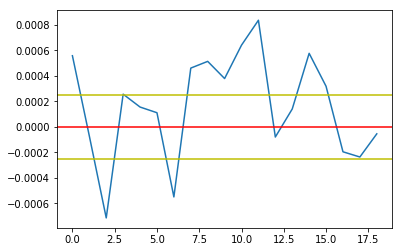

In [45]:
plt.plot(sum_windows[1:])
plt.axhline(y=0, c='r')
plt.axhline(y=-0.00025, c='y')
plt.axhline(y=0.00025, c='y')

In [46]:
window_labels = []
for window_sum in sum_windows:
    if window_sum > 0.00025 or window_sum < -0.00025:
        window_labels.append('walking downstairs')
    else:
        window_labels.append('walking')
print(window_labels)

['walking downstairs', 'walking downstairs', 'walking', 'walking downstairs', 'walking downstairs', 'walking', 'walking', 'walking downstairs', 'walking downstairs', 'walking downstairs', 'walking downstairs', 'walking downstairs', 'walking downstairs', 'walking', 'walking', 'walking downstairs', 'walking downstairs', 'walking', 'walking', 'walking']


In [13]:
raw_pressure_values.head()

,timestamp,pressure,UUID
0,1498222792102,958.580566,80ec3f676e17debf
1,1498222851007,958.407959,80ec3f676e17debf
2,1498222851223,958.365479,80ec3f676e17debf
3,1498222851369,958.297119,80ec3f676e17debf
4,1498222851547,958.240479,80ec3f676e17debf


In [24]:
len(window_labels)

19

In [17]:
ts_windows[0], len(ts_windows)

([1498222851007,
  1498222851223,
  1498222851369,
  1498222851547,
  1498222851729,
  1498222851907,
  1498222852090,
  1498222852273,
  1498222852446,
  1498222852627,
  1498222852807,
  1498222852987,
  1498222853172,
  1498222853350,
  1498222853527,
  1498222853708,
  1498222853895],
 19)

In [40]:
ts_windows[17]

[1498222903749,
 1498222903929,
 1498222904111,
 1498222904470,
 1498222904651,
 1498222904829,
 1498222905023,
 1498222905190,
 1498222905371,
 1498222905557,
 1498222905738,
 1498222905911,
 1498222906089,
 1498222906269,
 1498222906449,
 1498222906629]

In [28]:
ts_windows[18]

[1498222906810,
 1498222906995,
 1498222907169,
 1498222907349,
 1498222907529,
 1498222907709,
 1498222907889,
 1498222908249,
 1498222908429,
 1498222908609,
 1498222908789,
 1498222908969,
 1498222909150,
 1498222909336,
 1498222909515,
 1498222909689]

In [47]:
def transfer_label_from_windows_to_sample(row):
    for i in range(len(ts_windows)):
        if ts_windows[i].count(row[0]) > 0:
#             print(row[0],i, window_labels[i])
            return window_labels[i]

In [48]:
raw_pressure_values['label'] = raw_pressure_values.apply(transfer_label_from_windows_to_sample, axis=1)
print(raw_pressure_values.head())
print(raw_pressure_values.tail())

       timestamp    pressure             UUID                label
0  1498222792102  958.580566  80ec3f676e17debf                None
1  1498222851007  958.407959  80ec3f676e17debf  walking downstairs
2  1498222851223  958.365479  80ec3f676e17debf  walking downstairs
3  1498222851369  958.297119  80ec3f676e17debf  walking downstairs
4  1498222851547  958.240479  80ec3f676e17debf  walking downstairs
         timestamp    pressure             UUID     label
303  1498222910409  958.647461  80ec3f676e17debf  walking
304  1498222910592  958.642578  80ec3f676e17debf  walking
305  1498222910769  958.649658  80ec3f676e17debf  walking
306  1498222910952  958.655273  80ec3f676e17debf  walking
307  1498222911131  958.648682  80ec3f676e17debf  walking


In [49]:
pd.value_counts(raw_pressure_values['label'])

walking downstairs    196
walking               111
Name: label, dtype: int64

### Skewness on sliding windows

In [50]:
from scipy.stats import skew

skewness_windows = []
for i in range(len(windows)):
    skewness_windows.append(skew(windows[i]))
#     derivative_windows.append(derivative_window)
#     sum_windows.append(sum(derivative_window))
print(len(skewness_windows))
print(skewness_windows)

20
[0.8424046270977079, -0.09578882039877647, 0.039812112500885906, 0.8406200777268767, -0.07800922072896636, 0.4442570710248204, -0.05291018918326474, -0.2628785418383167, 1.149002710337047, -1.3201161604990401, -0.4060775857361996, 0.8458077467065529, 0.6820933071271323, 1.1946342596092423, 1.0402493966838406, 0.2614099767074768, -0.6128723147248937, -0.14370759517341183, -0.2039373273208959, 0.44143315704280967]


### Standard deviation on sliding windows

In [177]:
standard_deviation_windows = []
# sum_windows = []
for i in range(len(windows)):
    standard_deviation_windows.append([np.std(windows[i])])
#     sum_windows.append(sum(derivative_window))
print(standard_deviation_windows)
# print(sum_windows)

[[0.14594263252135264], [0.0295671810573278], [0.060702515443022555], [0.044190095492985991], [0.022292733142530514], [0.029440262956463573], [0.059442939772806964], [0.035446790063420025], [0.040513262362682594], [0.052088218176254135], [0.055204289299556203], [0.050514629561170019], [0.020313032839613429], [0.012840224820945732]]


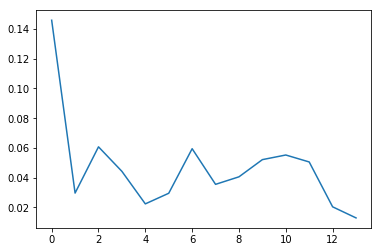

In [178]:
plt.plot(standard_deviation_windows)
# plt.axhline(y=0, c='r')
# plt.axhline(y=-0.00025, c='y')
# plt.axhline(y=0.00025, c='y')

In [185]:
from scipy.stats import iqr
iqr_windows = []
# sum_windows = []
for i in range(len(windows)):
    iqr_windows.append(iqr(windows[i]))
#     sum_windows.append(sum(derivative_window))
print(iqr_windows)
# print(sum_windows)

[0.223388671875, 0.10406494140625, 0.02520751953125, 0.048095703125, 0.0841064453125, 0.020751953125, 0.02667236328125, 0.06707763671875, 0.042724609375, 0.0234375, 0.031494140625, 0.034912109375, 0.081787109375, 0.0206298828125, 0.017333984375, 0.09326171875, 0.06048583984375, 0.02813720703125, 0.017333984375]


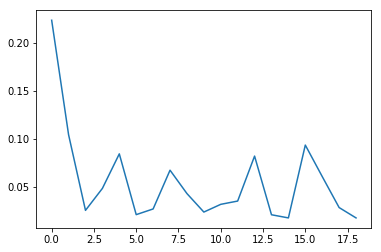

In [186]:
plt.plot(iqr_windows)
# plt.axhline(y=0, c='r')
# plt.axhline(y=-0.00025, c='y')
# plt.axhline(y=0.00025, c='y')

In [187]:
sample_windows = []
sample_ts_windows = []athens
sample_window_length = 10
for i in range(len(raw_pressure_values)):
    sample_window = raw_pressure_values[i:i+sample_window_length]
    sample_windows.append(sample_window)
print(len(sample_windows))

308


In [188]:
len(raw_pressure_values)

308

In [194]:
sample_windows = sample_windows[:-1 * (sample_window_length-1)]
print(len(sample_windows))
print(sample_windows[-1])

299
         timestamp    pressure             UUID 
298  1498222909515  958.667725  80ec3f676e17debf
299  1498222909689  958.658936  80ec3f676e17debf
300  1498222909873  958.657227  80ec3f676e17debf
301  1498222910057  958.660400  80ec3f676e17debf
302  1498222910230  958.668213  80ec3f676e17debf
303  1498222910409  958.647461  80ec3f676e17debf
304  1498222910592  958.642578  80ec3f676e17debf
305  1498222910769  958.649658  80ec3f676e17debf
306  1498222910952  958.655273  80ec3f676e17debf
307  1498222911131  958.648682  80ec3f676e17debf


In [205]:
sw_pressures = []
sw_ts = []
for window in sample_windows:
    sw_pressures.append(np.array(window[' pressure']))
    sw_ts.append(np.array(window['timestamp']))
print(len(sw_pressures), len(sw_ts))

299 299


In [206]:
print(sw_pressures[-1],sw_ts[-1])

[ 958.66772461  958.65893555  958.65722656  958.66040039  958.66821289
  958.64746094  958.64257812  958.6496582   958.65527344  958.64868164] [1498222909515 1498222909689 1498222909873 1498222910057 1498222910230
 1498222910409 1498222910592 1498222910769 1498222910952 1498222911131]


In [207]:
sw_pressures_medians = []
for window in sw_pressures:
    sw_pressures_medians.append(np.median(window))
print(len(sw_pressures_medians))

299


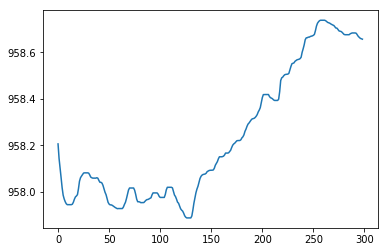

In [208]:
plt.plot(sw_pressures_medians)

In [226]:
sw_pr_median_windows = []
for i in range(len(sw_pressures_medians)):
    sw_pr_median_windows.append(sw_pressures_medians[i:i+sample_window_length])
print(len(sw_pr_median_windows),sw_pr_median_windows[-10:-1])
sw_pr_median_windows = sw_pr_median_windows[:-1 * (sample_window_length-1)]
print(len(sw_pr_median_windows))
print(sw_pr_median_windows[-1])

299 [[958.6829833984375, 958.6829833984375, 958.6829833984375, 958.681396484375, 958.6748046875, 958.66796875, 958.6640625, 958.65966796875, 958.6580810546875, 958.65625], [958.6829833984375, 958.6829833984375, 958.681396484375, 958.6748046875, 958.66796875, 958.6640625, 958.65966796875, 958.6580810546875, 958.65625], [958.6829833984375, 958.681396484375, 958.6748046875, 958.66796875, 958.6640625, 958.65966796875, 958.6580810546875, 958.65625], [958.681396484375, 958.6748046875, 958.66796875, 958.6640625, 958.65966796875, 958.6580810546875, 958.65625], [958.6748046875, 958.66796875, 958.6640625, 958.65966796875, 958.6580810546875, 958.65625], [958.66796875, 958.6640625, 958.65966796875, 958.6580810546875, 958.65625], [958.6640625, 958.65966796875, 958.6580810546875, 958.65625], [958.65966796875, 958.6580810546875, 958.65625], [958.6580810546875, 958.65625]]
290
[958.6829833984375, 958.6829833984375, 958.6829833984375, 958.681396484375, 958.6748046875, 958.66796875, 958.6640625, 958.659

In [229]:
sw_sd_pr_median_windows = []
for window in sw_pr_median_windows:
#     print(window)
    sw_sd_pr_median_windows.append(np.std(window))
print(len(sw_sd_pr_median_windows))

290


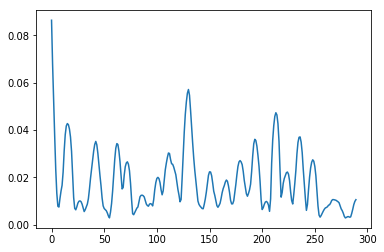

In [230]:
plt.plot(sw_sd_pr_median_windows)

In [236]:
sw_sd_pr_derivative_windows = []
sw_sd_pr_derivative_sums_windows = []
for window in sw_pr_median_windows:
    derivative_window = np.gradient(window)
#     print(len(window),len(derivative_window))
    sw_sd_pr_derivative_windows.append(derivative_window)
    sw_sd_pr_derivative_sums_windows.append(sum(derivative_window))
print(len(sw_sd_pr_derivative_windows))
print(len(sw_sd_pr_derivative_sums_windows))

290
290


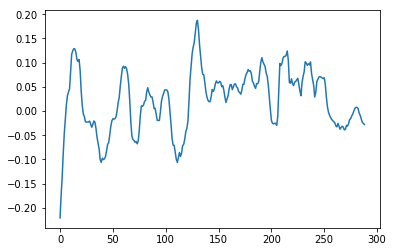

In [238]:
plt.plot(sw_sd_pr_derivative_sums_windows[1:])

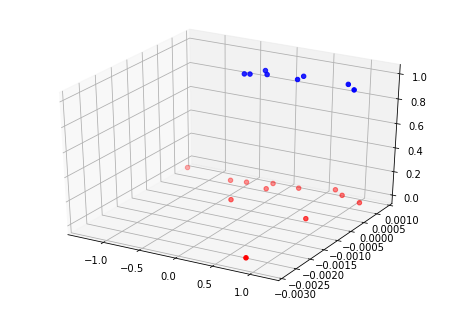

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax.scatter(skewness_windows, sum_windows, window_labels1, c=[(lambda x:'r' if x==0 else 'b')(x) for x in window_labels1])
# Axes3D.scatter(skewness_windows, sum_windows, window_labels1)
# plt.scatter(skewness_windows, sum_windows, window_labels1, c=['r','b'])
plt.show()
# plt.plot(skewness_windows, sum_windows)

In [61]:
len(window_labels)

20

In [64]:
window_labels1 = [(lambda x: 1 if x=='walking' else 0)(x) for x in window_labels]

In [66]:
window_labels1, window_labels

([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 ['walking downstairs',
  'walking downstairs',
  'walking',
  'walking downstairs',
  'walking downstairs',
  'walking',
  'walking',
  'walking downstairs',
  'walking downstairs',
  'walking downstairs',
  'walking downstairs',
  'walking downstairs',
  'walking downstairs',
  'walking',
  'walking',
  'walking downstairs',
  'walking downstairs',
  'walking',
  'walking',
  'walking'])

In [3]:
walking_files = ['Activity-Data/Walking/01/Walking01Pressure.csv', 'Activity-Data/Walking/2/Walking2Pressure.csv', 
                 'Activity-Data/Walking/3/Walking3Pressure.csv', 'Activity-Data/Walking/04/Walking04Pressure.csv',
                 'Activity-Data/Walking/5/Walking5Pressure.csv']
# walking_raw_pressure = pd.read_csv(walking_file,header=0, delimiter=',')
# print(len(walking_raw_pressure))
# walking_raw_pressure.head()

In [4]:
input_list = []
for walking_file in walking_files:
    df = pd.read_csv(walking_file, delimiter=',', header=0)
    input_list.append(df)
input_frame = pd.DataFrame()
input_frame = pd.concat(input_list)
input_frame.head()

,timestamp,pressure,UUID
0,1503925783809,963.727173,1b63307ec4900338
1,1503925785588,963.747253,1b63307ec4900338
2,1503925786383,963.760925,1b63307ec4900338
3,1503925786681,963.762085,1b63307ec4900338
4,1503925786897,963.759583,1b63307ec4900338


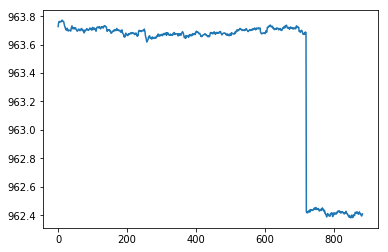

In [5]:
plt.plot(input_frame[' pressure'].values)

In [6]:
len(input_frame)

884

In [7]:
climbing_files = ['Activity-Data/Climbing_Stairs/1/Climbing_Stairs1Pressure.csv', 'Activity-Data/Climbing_Stairs/2/Climbing_Stairs2Pressure.csv', 
                 'Activity-Data/Climbing_Stairs/3/Climbing_Stairs3Pressure.csv', 'Activity-Data/Climbing_Stairs/5/Climbing_Stairs5Pressure.csv',
                 'Activity-Data/Climbing_Stairs/6/Climbing_Stairs6Pressure.csv', 'Activity-Data/Climbing_Stairs/7/Climbing_Stairs7Pressure.csv']

In [8]:
climb_list = []
for climbing_file in climbing_files:
    df = pd.read_csv(climbing_file, delimiter=',', header=0)
    climb_list.append(df)
climb_frame = pd.DataFrame()
climb_frame = pd.concat(climb_list)
print(len(climb_frame))
climb_frame.head()

377


,timestamp,pressure,UUID
0,1503926233330,963.686096,1b63307ec4900338
1,1503926233527,963.686096,1b63307ec4900338
2,1503926233726,963.682556,1b63307ec4900338
3,1503926233921,963.684448,1b63307ec4900338
4,1503926234223,963.679504,1b63307ec4900338


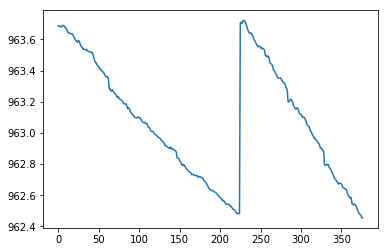

In [9]:
plt.plot(climb_frame[' pressure'].values)